In [99]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [100]:
e = 0.205630
b = 0.387098
G = 4*np.pi**2
alpha = 1.1e-8
r0 = np.array([b*(1+e), 0.])
v0 = np.array([0., np.sqrt((G*(1-e))/(b*(1+e)))])

In [101]:
def metodo_verlet(t, r0, v0):

    r=np.zeros((len(t), 2))
    v=np.zeros_like(r)
    a=np.zeros_like(r)
    #Definir paso
    h = t[1] - t[0]
    #Primer paso, valores del problema
    norma0 = np.linalg.norm(r0)
    r[0] = r0
    v[0] = v0
    a[0] = -r[0]*(G/(norma0**3))*(1+(alpha/(norma0**2)))
    
    for i in tqdm(range(0, len(t)-1)):
        
        r[i+1] = r[i] + v[i]*h + (0.5)*a[i]*h**2
        norma = np.linalg.norm(r[i+1])
        a[i+1] = -r[i+1]*(G/(norma**3))*(1+(alpha/(norma**2)))
        v[i+1] = v[i] + (h/2)*(a[i+1]+a[i])
        
    return r,v,a
        

In [102]:
t=np.arange(0.,2.4,1e-7)

In [103]:
r,v,a = metodo_verlet(t,r0,v0)

100%|██████████| 23999999/23999999 [16:30<00:00, 24226.99it/s]


In [106]:
normas = np.linalg.norm(r, axis=1)

tp = np.array([])
angulos = np.array([])
for i in range(1,len(normas)-1):
    if normas[i] < normas[i-1] and normas[i] < normas[i+1]:
        tp = np.append(tp, t[i])
        angulo = np.arctan(r[i][1]/r[i][0])*180/np.pi
        angulos = np.append(angulos, angulo)
angulos = np.sort(angulos)

    

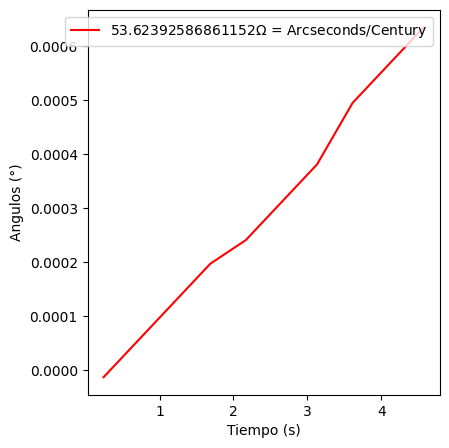

In [107]:
pendiente, _=np.polyfit(tp[0:], angulos[0:]-angulos[0], 1)*360000
fig = plt.figure(figsize=(10,5))
ax1= fig.add_subplot(121)
ax1.plot(tp*2,angulos*2, 'r-', label=str(pendiente)+"$\Omega$ = Arcseconds/Century")
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Angulos (°)')
plt.legend()